# **Association rule**

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt


In [3]:
!pip install openpyxl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Dataset**

In [5]:

# Load the dataset
# The engine is explicitly set to openpyxl
dataset = pd.read_excel('Online retail.xlsx', header=None, engine='openpyxl')

# Inspect the first few rows of the dataset
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


# **Data Preprocessing**

In [6]:
# Convert each row of products into a list of products
transactions = dataset[0].apply(lambda x: x.split(','))

# Display the first few transactions
transactions.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"[shrimp, almonds, avocado, vegetables mix, gre..."
1,"[burgers, meatballs, eggs]"
2,[chutney]
3,"[turkey, avocado]"
4,"[mineral water, milk, energy bar, whole wheat ..."


In [7]:
# Apply TransactionEncoder to the list of transactions
encoder = TransactionEncoder()
transaction_matrix = encoder.fit(transactions).transform(transactions)

# Convert the transaction matrix to a DataFrame
basket = pd.DataFrame(transaction_matrix, columns=encoder.columns_)

# Inspect the transaction matrix
basket.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# **Association Rule Mining**

In [8]:
# Apply Apriori algorithm to find frequent itemsets with a minimum support of 1% (0.01)
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
frequent_itemsets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)


# **Analysis and Interpretation**

In [10]:


# Generate association rules with a minimum lift of 1.0
# Calculate the total number of unique items from the frequent itemsets
num_itemsets = len(frequent_itemsets['itemsets'].apply(lambda x: list(x)[0]).unique())

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Display the association rules
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,1.0,0.003654,1.168147,0.325896,0.044593,0.143943,0.198329
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,1.0,0.003654,1.016113,0.413630,0.044593,0.015857,0.198329
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,1.0,0.004398,1.058080,0.420238,0.073129,0.054892,0.136473
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,1.0,0.004398,1.063198,0.417434,0.073129,0.059442,0.136473
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,1.0,0.002779,1.039630,0.178411,0.072934,0.038120,0.149934


In [11]:
# Sort rules by lift in descending order
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Display the top 10 rules
top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
214,(herb & pepper),(ground beef),0.015998,0.323450,3.291994
215,(ground beef),(herb & pepper),0.015998,0.162822,3.291994
387,(ground beef),"(mineral water, spaghetti)",0.017064,0.173677,2.907928
382,"(mineral water, spaghetti)",(ground beef),0.017064,0.285714,2.907928
394,"(mineral water, spaghetti)",(olive oil),0.010265,0.171875,2.609786
399,(olive oil),"(mineral water, spaghetti)",0.010265,0.155870,2.609786
193,(tomatoes),(frozen vegetables),0.016131,0.235867,2.474464
192,(frozen vegetables),(tomatoes),0.016131,0.169231,2.474464
189,(shrimp),(frozen vegetables),0.016664,0.233209,2.446574
188,(frozen vegetables),(shrimp),0.016664,0.174825,2.446574


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


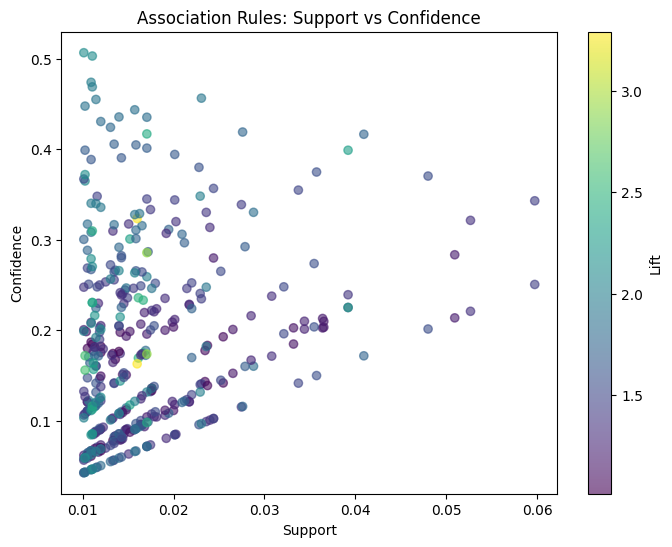

In [12]:
# Scatter plot of support vs confidence with lift as color
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.6)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar(label='Lift')
plt.show()


# **Interview Questions**

## **1.	What is lift and why is it important in Association rules?**

**Lift measures the strength of an association rule by comparing the observed frequency of two items being purchased together to the expected frequency if they were independent. It is important because it highlights relationships that are stronger than what would be expected by chance. A lift value greater than 1 indicates that the items are positively correlated, while a lift value less than 1 indicates that they are negatively correlated or that their co-occurrence is less than expected.**

## **2.	What is support and Confidence. How do you calculate them?**

# **support**

**Support is the proportion of transactions in the dataset that contain a particular itemset (products purchased together).**

 **It is calculated as:**

### **Support(X)= Transactions containing X / Total Transactions**
​


# **Confidence**


**Confidence is the probability that an item Y is purchased when item X is purchased. It is calculated as:**

### **Confidence(X→Y)= Support(X∪Y) / Support(X)**




# **3.	What are some limitations or challenges of Association rules mining?**

###**Scalability**:


**As the dataset grows, the number of possible itemsets and rules increases exponentially, making computation expensive.**


### **Sparsity:**

**Many association rules can be weak and uninteresting due to the sparse nature of real-world transaction data.**


### **Data quality:**

**Association rule mining is highly dependent on data quality. Missing, inconsistent, or incorrect data can lead to misleading results.**


### **Overfitting:**

**Setting inappropriate thresholds (e.g., very high confidence or lift) can result in overfitting, where the model detects trivial or spurious patterns.**


### **Interpretability:**

**Some rules may be complex or counterintuitive, making them difficult to interpret or use effectively in decision-making.**